**Setting up workspace**

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


**Importing data**

In [2]:
cfb = pd.read_csv('CFBeattendance.csv', encoding= 'unicode_escape').dropna()
print(cfb.columns)

Index(['Date', 'Team', 'Time', 'Opponent', 'Rank', 'Site', 'TV', 'Result',
       'Attendance', 'Current Wins', 'Current Losses', 'Stadium Capacity',
       'Fill Rate', 'New Coach', 'Tailgating', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'TMIN', 'Opponent_Rank', 'Conference', 'Year', 'Month', 'Day'],
      dtype='object')


**Cleaning data**

In [3]:
# adding a column to show team results
cfb['TeamResult'] = cfb.Result.str[0]

# cleaning team results to just show wins and losses
cfb = cfb[cfb.TeamResult != 'B']
cfb = cfb[cfb.TeamResult != 'N']

**Cleaning the date-time and setting the index to the day and time of the game**

In [4]:
cfb['DateTime'] = pd.to_datetime(cfb['Date'] + ' ' + cfb['Time'])
cfb['Date'] = pd.to_datetime(cfb['Date']).dt.date
cfb['Time'] = pd.to_datetime(cfb['Time']).dt.time
cfb.set_index('DateTime', inplace = True)

**Cleaning the Result Column**

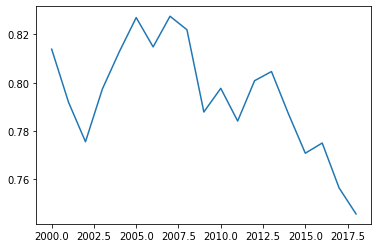

In [5]:
def find_numbers(s):
    return re.findall(r'\d+', s)

def score_dif(s):
    return int(s[0]) - int(s[1])

def find_ot(s):
    list = [int(i) for i in re.findall(r"(\d+)OT", s)]
    if list == []:
        if 'OT' in s:
            return 1
        else:
            return 0
    else:
        return list[0]

# finding just the scores in the results
cfb['Scores'] = (cfb['Result'].map(find_numbers))

# finding score difference 
cfb['ScoreDiff'] = (cfb['Scores'].map(score_dif))

# noting now many overtimes 
cfb['OT'] = cfb['Result'].map(find_ot)

#cfb.boxplot(column='Fill Rate', by='Year')
#scatter(cfb['OT'], cfb['Attendance'], s=1)

# fill rate trend
plot(cfb.groupby('Year')['Fill Rate'].mean())

In [6]:
# which teams have the highest fill rates
print(cfb.groupby('Team')['Fill Rate'].mean().sort_values())

def RankToInt(s):
    if 'NR' in s:
        return 99
    else:
        return int(s)

# set NR team to r = 99
cfb['Rank'] = cfb['Rank'].map(RankToInt)

# viewing fill rate based on Rank
print(cfb.groupby('Rank')[['Fill Rate']].mean().sort_values(by='Rank'))

Team
Georgia State     0.295796
Ball State        0.377915
South Alabama     0.427768
Kent State        0.460746
Memphis           0.520780
                    ...   
Notre Dame        1.000015
Wisconsin         1.001305
Michigan State    1.003290
Oklahoma          1.033776
Nebraska          1.057994
Name: Fill Rate, Length: 63, dtype: float64
      Fill Rate
Rank           
1      0.998106
2      0.993094
3      0.974441
4      0.960872
5      0.990305
6      0.965400
7      0.961837
8      0.965779
9      0.953325
10     0.976486
11     0.968902
12     0.982904
13     0.913965
14     0.969980
15     0.951674
16     0.946960
17     0.925690
18     0.919759
19     0.943813
20     0.941482
21     0.928938
22     0.942707
23     0.935226
24     0.929700
25     0.931306
99     0.748975


isRanked                  0         1  Rank Lift
Team                                            
Ball State         0.366469  0.648797  77.040250
UTEP               0.581445  0.883942  52.025058
Kent State         0.458486  0.668696  45.848890
Northwestern       0.605942  0.876715  44.686349
UCF                0.639168  0.918749  43.741335
San Diego State    0.562107  0.784907  39.636601
Miami (OH)         0.627855  0.875850  39.498671
Kansas             0.721639  1.001031  38.716205
Northern Illinois  0.642688  0.887746  38.130036
Hawaii             0.653371  0.878493  34.455411
Baylor             0.724599  0.972753  34.247026
Memphis            0.512367  0.679223  32.565615
Louisiana Tech     0.636740  0.804886  26.407283
California         0.705142  0.860479  22.029278
Rutgers            0.821907  0.998413  21.475217
Virginia           0.791788  0.958083  21.002529
USC                0.722128  0.862606  19.453276
Southern Miss      0.770363  0.907608  17.815497
Troy               0

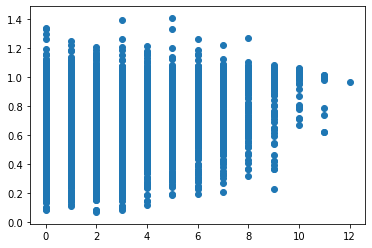

In [22]:
def isRank(s):
    if s <= 25:
        return 1
    else:
        return 0



cfb['isRanked'] = cfb['Rank'].map(isRank)
pivoted = (pd.pivot_table(cfb, index = 'Team', \
                     columns = ['isRanked'], \
                     values = 'Fill Rate', \
                     fill_value = 0, \
                     aggfunc = 'mean').sort_values(by=1))

pivoted['Rank Lift'] = 100*(pivoted[1] - pivoted[0])/pivoted[0]

print(pivoted.sort_values(by='Rank Lift', ascending=False)[:20])

mask = pivoted['Rank Lift'] > 0

print(pivoted[mask].sort_values(by='Rank Lift')[:20])

# site
# opponent 
# team

scatter(cfb['Current Wins'],cfb['Fill Rate'])